In [1]:
from __future__ import print_function
import torch

# Tensors

In [2]:
x=torch.Tensor(5,3) #this is like a numpy ndarray that can be used on a gpu
print(x)
x


-1.2327e-10  4.5615e-41 -1.2327e-10
 4.5615e-41         nan  0.0000e+00
 4.4721e+21  1.6647e-41  6.7262e-44
 0.0000e+00  6.7262e-44  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]




-1.2327e-10  4.5615e-41 -1.2327e-10
 4.5615e-41         nan  0.0000e+00
 4.4721e+21  1.6647e-41  6.7262e-44
 0.0000e+00  6.7262e-44  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]

In [3]:
x=torch.rand(5,3)
print(x)


 0.0157  0.2699  0.5214
 0.9493  0.6618  0.8146
 0.1154  0.0939  0.4040
 0.2453  0.9270  0.0384
 0.3042  0.6990  0.5864
[torch.FloatTensor of size 5x3]



In [4]:
print(x.size()) #this is a tuple

torch.Size([5, 3])


In [5]:
y=torch.rand(5,3)
print(x+y)


 0.1926  0.5780  0.5243
 1.2588  0.6998  0.9987
 1.0572  0.2065  0.7814
 1.0752  1.7246  0.2814
 0.5077  1.1861  1.5443
[torch.FloatTensor of size 5x3]



In [6]:
print(torch.add(x,y))


 0.1926  0.5780  0.5243
 1.2588  0.6998  0.9987
 1.0572  0.2065  0.7814
 1.0752  1.7246  0.2814
 0.5077  1.1861  1.5443
[torch.FloatTensor of size 5x3]



In [7]:
result=torch.Tensor(5,3)
torch.add(x,y,out=result)
print(result)


 0.1926  0.5780  0.5243
 1.2588  0.6998  0.9987
 1.0572  0.2065  0.7814
 1.0752  1.7246  0.2814
 0.5077  1.1861  1.5443
[torch.FloatTensor of size 5x3]



In [8]:
y.add_(x) #post-fixed with _ means in place!
print(y)


 0.1926  0.5780  0.5243
 1.2588  0.6998  0.9987
 1.0572  0.2065  0.7814
 1.0752  1.7246  0.2814
 0.5077  1.1861  1.5443
[torch.FloatTensor of size 5x3]



In [9]:
print(x[:,1]) #standard numpy array indexing


 0.2699
 0.6618
 0.0939
 0.9270
 0.6990
[torch.FloatTensor of size 5]



In [10]:
a=torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [11]:
b=a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [12]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [13]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) #convert any tensor except CharTensor
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



# autograd

In [14]:
from torch.autograd import Variable

In [15]:
x=Variable(torch.ones(2,2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [16]:
y=x+2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [17]:
print(y.grad_fn)

In [18]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [19]:
out.backward()

In [20]:
print(x.grad)   #gradient through all computations:
                # y= x+2
                # z= 3y^2
                # out=sum(z)/numelts(z) (sum(z)/4)
                # out|x==1 = 3*(x+2)^2 where z1=27
                # do/dx|x==1 = (3/2)(x+2) = 9/2

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [21]:
x=torch.randn(3)
x=Variable(x, requires_grad=True)

y=x*2
while y.data.norm()<1000:
    y=y*2
print(y)

Variable containing:
 1614.4769
 -121.4711
  576.5482
[torch.FloatTensor of size 3]



In [22]:
gradients=torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



# neural nets

In [23]:
import torch.nn as nn       #only takes minibatches. if one sample, use 
                            #input.unsqueeze(0) to add fake batch dimension
import torch.nn.functional as F

In [24]:
class Net(nn.Module): #expected size for LeNet is 32x32! resize images
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        #affine operation: y=Wx+b
        self.fc1=nn.Linear(16*5*5, 120)
        self.fc2=nn.Linear(120, 84)
        self.fc3=nn.Linear(84, 10)
    
    def forward(self, x):
        # Max pooling over a (2,2) window
        x=F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        #if the size is a square you can only specify a single number
        x=F.max_pool2d(F.relu(self.conv2(x)), 2)
        x=x.view(-1, self.num_flat_features(x))
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size=x.size()[1:]
        num_features=1
        for s in size:
            num_features *= s
        return num_features

net=Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [25]:
params=list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [26]:
input=Variable(torch.randn(1,1,32,32))
out=net(input)
print(out)

Variable containing:
-0.0875 -0.0471  0.1235  0.0913  0.0433  0.0579  0.0835 -0.0641  0.0263  0.0897
[torch.FloatTensor of size 1x10]



In [27]:
net.zero_grad()
out.backward(torch.randn(1,10))

# loss function

In [28]:
output=net(input)
target=Variable(torch.arange(1,11)) #dummy target
criterion=nn.MSELoss()
loss=criterion(output,target)
print(loss)

Variable containing:
 38.0412
[torch.FloatTensor of size 1]



In [29]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

# backprop

In [30]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print ('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  1.3109
  3.4045
  6.6874
 -2.0418
 -4.1406
 -3.5253
[torch.FloatTensor of size 6]



# update weights

In [31]:
learning_rate=0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [32]:
import torch.optim as optim

#create optimizer
optimizer=optim.SGD(net.parameters(), lr=0.01)

#in training loop:
optimizer.zero_grad()
output=net(input)
loss = criterion(output,target)
loss.backward()
optimizer.step() #does the update

# data
- for images, try Pillow and OpenCV
- audio scipy, librosa
- text raw python or cython, NLTK, SpaCy



For vision, **torchvision** has data loaders for common datasets and data transformers for images: __torchvision.datasets__ and __torch.utils.data.DataLoader__

In [33]:
import torchvision
import torchvision.transforms as transforms

In [34]:
transform=transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))])

trainset=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 deer   car  bird   dog


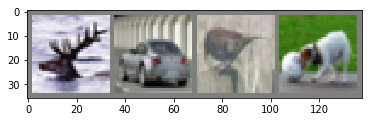

In [35]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def imshow(img):
    img=img/2+0.5   #unnormalize
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
dataiter=iter(trainloader)
images, labels=dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [36]:
#same net as above but mod'd to take three-channel images:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [37]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# training

In [38]:
for epoch in range(2):
    running_loss=0.0
    for i, data in enumerate(trainloader, 0):
        #get inputs
        inputs, labels=data
        
        #wrap into variables
        inputs, labels=Variable(inputs), Variable(labels)
        
        #zero parameter gradients
        optimizer.zero_grad()
        
        #forward+backward+optimize
        outputs=net(inputs)
        loss=criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss+=loss.data[0]
        if i % 2000==1999: #print every 2000 minibatches
            print('[%d, %5d] loss: %.3f' %
                 (epoch+1, i+1, running_loss/2000))
            running_loss=0.0
            
print('Finished Training')

[1,  2000] loss: 2.153
[1,  4000] loss: 1.790
[1,  6000] loss: 1.628
[1,  8000] loss: 1.545
[1, 10000] loss: 1.502
[1, 12000] loss: 1.469
[2,  2000] loss: 1.410
[2,  4000] loss: 1.369
[2,  6000] loss: 1.339
[2,  8000] loss: 1.323
[2, 10000] loss: 1.293
[2, 12000] loss: 1.277
Finished Training


# testing

GroundTruth:    cat  ship  ship plane


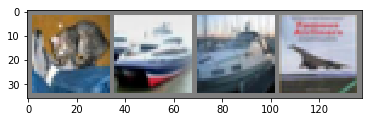

In [39]:
dataiter=iter(testloader)
images, labels=dataiter.next()

#print some images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [40]:
outputs = net(Variable(images))

In [41]:
_, predicted=torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car   car plane


In [42]:
correct=0
total=0
for data in testloader:
    images, labels=data
    outputs=net(Variable(images))
    _,predicted=torch.max(outputs.data, 1)
    total+= labels.size(0)
    correct += (predicted==labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' %(100*correct/total))

Accuracy of the network on the 10000 test images: 54 %


In [43]:
class_correct=list(0. for i in range(10))
class_total=list(0. for i in range(10))
for data in testloader:
    images, labels=data
    outputs=net(Variable(images))
    _,predicted=torch.max(outputs.data, 1) #max along 1st dim
    c=(predicted==labels).squeeze()        #squeeze dim's with 1 to nothing ie (1,3,1)->(3,)
    for i in range(4):                     #does outputs.data return top five guesses?
        label=labels[i]                    #is there only five choices per image provided?
        class_correct[label]+= c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 82 %
Accuracy of  bird : 41 %
Accuracy of   cat : 27 %
Accuracy of  deer : 28 %
Accuracy of   dog : 37 %
Accuracy of  frog : 84 %
Accuracy of horse : 64 %
Accuracy of  ship : 59 %
Accuracy of truck : 57 %


# data loading and processing

In [44]:
from __future__ import print_function, division
import os
import pandas as pd
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

#ignore warnings
import warnings
warnings.filterwarnings("ignore")
plt.ion()

In [45]:
landmarks_frame=pd.read_csv('data/faces/face_landmarks.csv')

n=20
img_name = landmarks_frame.ix[n,0]
landmarks=landmarks_frame.ix[n,1:].as_matrix().astype('float')
landmarks=landmarks.reshape(-1,2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 landmarks: {}'.format(landmarks[:4]))
landmarks_frame.tail()

Image name: 262007783_943bbcf613.jpg
Landmarks shape: (68, 2)
First 4 landmarks: [[ 123.  137.]
 [ 128.  176.]
 [ 137.  215.]
 [ 150.  250.]]


,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
64,matt-mathes.jpg,85,152,83,173,83,195,85,217,91,...,160,224,190,225,162,236,151,237,141,235
65,person-7.jpg,32,65,33,76,34,86,34,97,37,...,79,98,91,99,79,99,74,99,69,99
66,person.jpg,78,83,79,93,80,103,81,112,85,...,119,115,132,114,120,121,114,122,109,121
67,person_TjahjonoDGondhowiardjo.jpg,41,92,41,103,43,114,44,125,48,...,85,130,94,130,85,128,81,128,77,128
68,personalpic.jpg,40,109,40,122,41,135,42,148,44,...,80,165,94,165,80,165,74,165,68,164


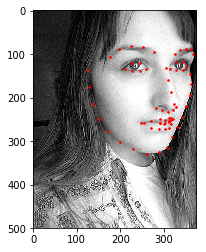

In [46]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:,0], landmarks[:,1], s=10, marker='.', c='r')
    plt.pause(.001)
plt.figure()
show_landmarks(io.imread(os.path.join('data/faces', img_name)), landmarks)
plt.show()

# create your own dataset class from your data
- override __len__ so that _len(dataset)_ returns size of dataset
- override __getitem__ to support the indexing such that _dataset[i]_ can be used to get the ith sample

In [47]:
class FaceLandmarksDataset(Dataset):
    '''Face Landmarks dataset.'''
    def __init__(self, csv_file, root_dir, transform=None):
        '''
        Args: 
            csv_file(string): Path to the csv file with annotations
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be 
                applied on a sample.
            '''
        self.landmarks_frame=pd.read_csv(csv_file)
        self.root_dir=root_dir
        self.transform=transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        img_name=os.path.join(self.root_dir, self.landmarks_frame.ix[idx,0])
        image=io.imread(img_name)
        landmarks=self.landmarks_frame.ix[idx,1:].as_matrix().astype('float')
        landmarks=landmarks.reshape(-1,2)
        sample={'image':image, 'landmarks':landmarks}
        
        if self.transform:
            sample=self.transform(sample)
            
        return sample

0 (324, 215, 3) (68, 2)
1 (500, 333, 3) (68, 2)
2 (250, 258, 3) (68, 2)
3 (434, 290, 3) (68, 2)


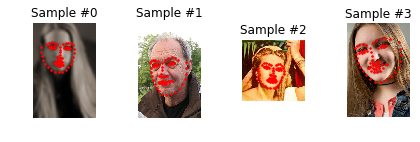

In [48]:
face_dataset=FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv',
                                 root_dir='data/faces/')

fig=plt.figure()

for i in range(len(face_dataset)):
    sample=face_dataset[i]
    
    print(i, sample['image'].shape, sample['landmarks'].shape)
    
    ax=plt.subplot(1,4,i+1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)
    
    if i==3:
        plt.show()
        break

# transforms for data preprocessing
- `Rescale`: scale image
- `RandomCrop`:crop from image randomly for data augmentation
- `ToTensor`:convert numpy images to torch images (need to swap axes)

write as callable classes so params aren't passed every time. need to implement `__call__` and if required `__init__`

then we can use it like this:

    tsfm=Transform(params)
    transformed_sample=tsfm(params)

transforms must be applied to images *and* landmarks

In [59]:
class Rescale(object):
    '''Rescale the image in a sample to a given size
    Args:
        output_size(tuple or int): desired output size. If tuple,
        output is matched to output_ize. if int, smaller of image 
        edges is matched to output_size keeping aspect ratio the same.
    '''
    
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size=output_size
    
    def __call__(self,sample):
        image, landmarks=sample['image'], sample['landmarks']
        
        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)
        
        img=transform.resize(image, (new_h, new_w))
        
        #h and w are swapped for landmarks because for images,
        #x and y axes are axis 1 and axis 0 respectively
        landmarks=landmarks*[new_w/w, new_h/h]
        
        return{'image':img, 'landmarks':landmarks}

class RandomCrop(object):
    '''Crop randomly the image in a sample.
    Args:
        output_size(tuple or int): desired output size. If int,
            square crop is made.
    '''
    
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size)==2
            self.output_size=output_size
    
    def __call__(self, sample):
        image, landmarks=sample['image'], sample['landmarks']
        
        h,w=image.shape[:2]
        new_h, new_w=self.output_size
        
        top=np.random.randint(0,h-new_h)
        left=np.random.randint(0,w-new_w)
        
        image=image[top:top+new_h, left:left+new_w]
        
        landmarks=landmarks-[left,top]
        
        return {'image':image, 'landmarks':landmarks}
    
class ToTensor(object):
    '''Convert ndarrays in sample to Tensors'''
    
    def __call__(self, sample):
        image, landmarks=sample['image'], sample['landmarks']
        
        #swap color axis because
        #numpy image: HxWxC
        #torch image: CxHxW
        image=image.transpose((2,0,1))
        return {'image': torch.from_numpy(image),
              'landmarks': torch.from_numpy(landmarks)}    

apply the transforms on a sample. ie, rescale shorter side of image to 256 and then randomly crop squares of 224 from it. you can compose `Rescale` and `RandomCrop` with `torchvision.transforms.Compose`:

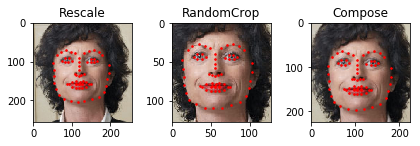

In [60]:
scale=Rescale(256)
crop=RandomCrop(128)
composed=transforms.Compose([Rescale(256), RandomCrop(224)])

#apply each on sample:
fig=plt.figure()
sample=face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample=tsfrm(sample)
    
    ax=plt.subplot(1,3,i+1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

create final dataset with composed transforms. every time dataset is sampled:
- image is read from the file
- transforms are applied on read image
- one of the transforms is random, so data is augmentated on sampling

iterate over created dataset with a `for i in range` loop as before

In [61]:
transformed_dataset=FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv',
                                        root_dir='data/faces/',
                                        transform=transforms.Compose([
                                            Rescale(256), 
                                            RandomCrop(224), 
                                            ToTensor()
                                        ]))

for i in range(len(transformed_dataset)):
    sample=transformed_dataset[i]
    
    print(i, sample['image'].size(), sample['landmarks'].size())
    
    if i==3:
          break


0 torch.Size([3, 224, 224]) torch.Size([68, 2])
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
3 torch.Size([3, 224, 224]) torch.Size([68, 2])


`torch.utils.DataLoader` provides:
- batch
- shuffle
- load in parallel

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])


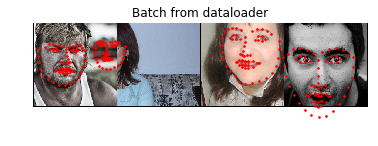

In [65]:
dataloader=DataLoader(transformed_dataset, batch_size=4, 
                      shuffle=True, num_workers=4)

#Helper function to show a batch:
def show_landmarks_batch(sample_batched):
    '''Show image with landmarks for a batch of samples'''
    images_batch, landmarks_batch= \
        sample_batched['image'], sample_batched['landmarks']
    batch_size=len(images_batch)
    im_size=images_batch.size(2)
    
    grid=utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1,2,0)))
    
    for i in range(batch_size):
        plt.scatter(landmarks_batch[i,:,0].numpy()+i*im_size,
                   landmarks_batch[i,:,1].numpy(),
                   s=10,marker='.', c='r')
        plt.title('Batch from dataloader')
        
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
         sample_batched['landmarks'].size())

    if i_batch==3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break


# torchvision
contains common datasets and common transforms.

`ImageFolder` assumes images are organized like this:
    
    `root/ants/xxx.png
    root/ants/xxy.jpeg
    root/ants/xxz.png
    .
    .
    .
    root/bees/123.jpg
    root/bees/nsdf3.png
    root/bees/asd932_.png`

where 'ants' and 'bees' are class labels. 

Transforms that operate on `PIL.Image`:
- `RandomHorizontalFlip`
- `Scale`
- others

In [68]:
from torchvision import transforms, datasets

data_transform=transforms.Compose([
    transforms.RandomSizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
#hymenoptera_dataset = datasets.ImageFolder(root='hymenoptera_data/train',
 #                                         transform=data_transform)
#dataset_loader=torch.utils.data.DataLoader(hymenoptera.dataset, batch_size=4, shuffle=True, num_workers=4)